In [1]:
#importing libraries 
import numpy as np
import scipy.stats as st
import statistics as stats
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr 
from matplotlib.colors import LogNorm
from matplotlib import colors
%matplotlib inline  

Particulate Nd eqn:

$$ \frac{dC_{p}}{dt}=K_v\frac{d^{2} C_{p}}{dz^{2}}-k_1*C_{d} -S\frac{dC_p}{dz} $$

$$ \frac{C_{p[j,i+1]}-C_{p[j,i]}}{dt}=(\frac{K_v*(C_{p[j+1,i]}-2C_{p[j,i]}+C_{p[j-1,i]})}{dz^{2}}+k_1*C_{d[j,i]}-S*\frac{(C_{p[j+1,i]}-C_{p[j,i]})}{dz} ) $$


$$ C_{p[j,i+1]}=(\frac{K_v*(C_{p[j+1,i]}-2C_{p[j,i]}+C_{p[j-1,i]})}{dz^{2}}+k_1*C_{d[j,i]}-S*\frac{(C_{p[j+1,i]}-C_{p[j,i]})}{dz} )*dt+C_{p[j,i]} $$




Dissolved Nd eqn:
$$ \frac{dC_{d}}{dt}=K_v\frac{d^{2} C_{d}}{dz^{2}}-k_1*C_{d}  $$

$$ \frac{C_{d[j,i+1]}-C_{d[j,i]}}{dt}=(\frac{K_v*(C_{d[j+1,i]}-2C_{d[j,i]}+C_{d[j-1,i]})}{dz^{2}}-k_1*C_{d[j,i]} ) $$

$$ C_{d[j,i+1]}=(\frac{K_v*(C_{d[j+1,i]}-2C_{d[j,i]}+C_{d[j-1,i]})}{dz^{2}}-k_1*C_{d[j,i]} )*dt +C_{d[j,i]}$$

$$ \frac{\delta C_{d}}{\delta t}=0=K_v*\frac{\delta C_{d}^{2}}{\delta z^{2}}-k_1*C_{d}  $$

$$ 0=K_v*\frac{\delta^{2} C_{d}}{\delta z^{2}}-k_1*C_{d}  $$

$$ K_v*\frac{\delta^{2} C_{d}}{\delta z^{2}}=k_1*C_{d}  $$

$$ \frac{\delta^{2} C_{d}}{\delta z^{2}}=\frac{k_1}{K_v}*C_{d}  $$


$$ C=C_0e^{\frac{-z}{\zeta}} $$

$$ \int \frac{\delta^{2}e^{\frac{z}{\zeta}} }{\delta z^{2}} = \int \frac{k_1}{K_v} e^{\frac{z}{\zeta}} $$

$$  (\frac{1}{\zeta})^{2} e^{\frac{z}{\zeta}} = \frac{k_1}{K_v} e^{\frac{z}{\zeta}} $$
$$  (\frac{1}{\zeta})^{2} e^{\frac{z}{\zeta}}-\frac{k_1}{K_v} e^{\frac{z}{\zeta}} =0$$
$$  e^{\frac{z}{\zeta}}( (\frac{1}{\zeta})^{2}-\frac{k_1}{K_v}) =0$$
$$  (\frac{1}{\zeta})^{2}-\frac{k_1}{K_v} =0$$
$$  (\frac{1}{\zeta})^{2}=\frac{k_1}{K_v}$$
$$  {\zeta}=\sqrt{\frac{K_v}{k_1}}$$

In [2]:
dt=0.001 # small time step to accomidate CFL citerion 
t_300=int(300/dt) #300 year runtime 
t_10000=int(10000/dt) #10000 year runtime 

In [3]:
mw_c=0.06#  #Calcite sinking speed increase with depth (s-1) 
wc0=35    #constant calcite sinking speed [m/day] 

In [4]:
#depth layers replicated from UVic ESCM 
z_F=np.array([0,17.5,82.5,177.5,302.5,457.5, 642.5,857.5, 1102.5, 1377.5,1682.5, 2017.5, 2382.5, 2777.5, 3202.5,3657.5, 4142.5,4657.5,5202.5, 5777.5] )
num=(len(z_F))
dz=np.zeros(num-1)
z_C=np.zeros(num-1)
for i in range(num-1):
    dz[i]=z_F[i+1]-z_F[i]
    z_C[i]=(z_F[i+1]+z_F[i])/2

In [5]:

#dt=0.2#sec
#Sed_flux=(10e-12*100**2)#mol Nd yr intial sed flux in mol/m2 yr in proposal 20pmol cm-2 yr-1
#Sed_flux_5=(5e-12*100**2)#mol Nd yr intial sed flux in mol/m2 yr in proposal 20pmol cm-2 yr-1
Ko=(10**(-4)*60*60*24*365) #m2/s to m2/yr vertical diffusivity 
Kf=(10**(-5)*60*60*24*365) #m2/s to m2/yr vertical diffusivity 
c=1/500 #1/500m obervation e folding depth
#D=Ko*np.exp((-z_F[:]+z_F[-1])*-c)+Kf
D=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
Kp=0.001425#adsorption coefficent
K_desorp=0.0358 #desorption
zeta=np.sqrt(D/Kp)

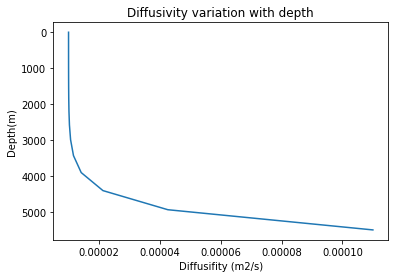

In [6]:
plt.title('Diffusivity variation with depth')
plt.plot(D/(60*60*24*365),z_C)
plt.xlabel("Diffusifity (m$^2$/s)")
plt.ylabel("Depth(m)")
plt.gca().invert_yaxis()

In [7]:
area_freq=[0.000E+00,5.278E+12,2.898E+12, 2.974E+12,3.387E+12, 3.367E+12,8.289E+12,1.410E+13, 7.050E+12,8.256E+12,1.859E+13,2.469E+13,1.453E+13,2.496E+13,4.086E+13,5.308E+13,4.757E+13,4.940E+13,2.750E+13]

In [8]:
total_area=np.sum(area_freq)
rel_area=area_freq/total_area

Text(0, 0.5, 'depth (m)')

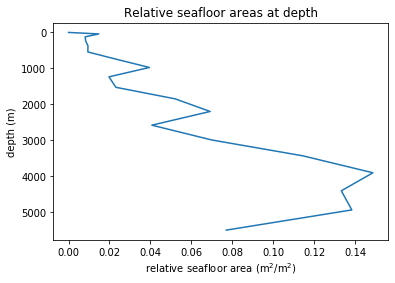

In [9]:
plt.title('Relative seafloor areas at depth')
plt.plot(rel_area,z_C)
plt.gca().invert_yaxis()
plt.xlabel('relative seafloor area (m$^{2}$/m$^{2}$)')
plt.ylabel('depth (m)')

In [10]:
F_b=((10e-12*100**2)*rel_area)/dz
#F_b_5=(Sed_flux_5*rel_area)/dz

Text(0, 0.5, 'depth (m)')

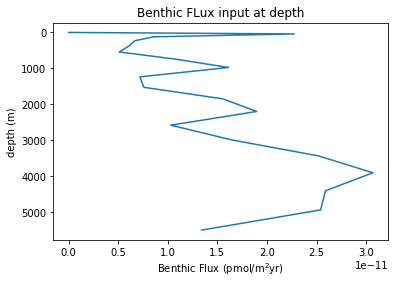

In [11]:
plt.title('Benthic FLux input at depth')
plt.plot(F_b,z_C)
plt.gca().invert_yaxis()
plt.xlabel('Benthic Flux (pmol/m$^{2}$yr)')
plt.ylabel('depth (m)')

In [12]:
#z_F:  is the depth layers (meters)
#dt:   time step (years) 
#Sed_flux: the sediment flux(pmol cm^-2 yr ^-1)
#Diffusivity :veritical Diffusivity (m/yr)
#Kp : Adsorption coefficeint (yr^-1)
#t: number of time steps (years)
mw_c=0.06#  #Calcite sinking speed increase with depth (s-1) 
wc0=35    #constant calcite sinking speed [m/day]

#function to calculate irriversable scavenging 
def calc_IR_conc(z_F,dt,Sed_Flux,Diffusivity,Kp,t):

    num=(len(z_F))                       #number of layers 
    dz=np.zeros(num-1)                   #the distance between layers empty array 
    z_C=np.zeros(num-1)                  #the depth at the center of the layer empty array 
    for i in range(num-1):               # for loop to fill dz and z_C array based on the z_F  
        dz[i]=z_F[i+1]-z_F[i]
        z_C[i]=(z_F[i+1]+z_F[i])/2
        
        
        
    
    
    Sed_flux_converted= (Sed_Flux*1e-12*100**2)#mol Nd yr intial sed flux in mol/m2 yr in proposal 20pmol cm-2 yr-1
    D=Diffusivity#m2/s to m2/yr vertical diffusivity 
    zeta=np.sqrt(D/Kp)    
    F_b=(Sed_flux_converted*rel_area)/dz
    
    
    Cd=np.zeros((num-1,t)) #2D depth and time array for dissolved concentration 10000 when p=1
    F=np.zeros((num,t-1)) #2D depth and time array for diffusive flux
    F_diffusion=np.zeros((num,t-1)) #2D depth and time array for diffusive flux
    Cp=np.zeros((num-1,t)) #2D depth and time array for particle concentration 
    F_p=np.zeros((num,t-1)) #2D depth and time array for diffusive flux for particle 
    S_F=np.zeros((num,t-1)) #2D depth and time array for sinking flux
    D_S=np.zeros((num-1,t-1)) #2D divergence of flux
    D_F=np.zeros((num-1,t-1)) #2D divergence of flux
    S=np.zeros((num-1)) #2D depth and time array for sinking speed
    vel=np.zeros((num-1)) #2D depth and time array for sinking speed
    #Cd[0,:]=16.73e-12*1000 # background Nd mol 

    F[-1,:]=0
    F_p[-1,:]=0  
    F[0,:]=0
    F_p[0,:]=0
    S_F[0,:]=0


    for k in range (0,num-1):            
 
        if z_F[k]<(1000):
            S[k]=(wc0+(mw_c)*(abs(z_F[0]-z_C[k])))/(60*60*24*dz[k])# s-1    
        elif z_F[k]>=(1000):
            S[k]=(wc0+mw_c*(1000))/(60*60*24*dz[k]) #s-1 
        vel[k]=S[k]*(60*60*24*365) #yr-1
    for i in range (0,t-1):                 
        for k in range (1,num-1):
        
            F[k,i]=D[k]*((Cd[k,i]-Cd[k-1,i])/dz[k])           

            F_p[k,i]=D[k]*((Cp[k,i]-Cp[k-1,i])/dz[k])
   
        for k in range(1,num):
        
            S_F[k,i]=vel[k-1]*Cp[k-1,i]
        for k in range(0,num-1):
       
        
            D_S[k,i]=(S_F[k+1,i]-S_F[k,i])#divergence of advection 

            Cd[k,i+1]=((((F[k+1,i]-F[k,i])/dz[k])-Kp*Cd[k,i]+F_b[k])*dt+Cd[k,i]) #dissolved Nd concentration
            D_F[k,i]=(F_p[k+1,i]-F_p[k,i])/dz[k]      # divergence of diffusion flux 
       
            Cp[k,i+1]=((((F_p[k+1,i]-F_p[k,i])/dz[k])+(Kp*Cd[k,i])-D_S[k,i])*dt+Cp[k,i]) #particulate Nd concentration
        
    return(Cd,Cp,z_C) # output of dissolved particulate and depth layers
     

In [13]:
UVIC10000yr_ds=xr.open_dataset('Datasets/tavg.01000.01.01.nc',decode_times=False) # 3D model data
GEOTRACERS_ds=xr.open_dataset('Datasets/Nd_UVicgrid.nc',decode_times=False) # Geotracer data 

In [14]:
GEOTRACERS_ds

<xarray.Dataset>
Dimensions:         (DEPTH: 19, LATITUDE: 100, LONGITUDE: 100, bnds: 2)
Coordinates:
  * LONGITUDE       (LONGITUDE) float64 1.8 5.4 9.0 12.6 ... 351.0 354.6 358.2
  * LATITUDE        (LATITUDE) float64 -89.1 -87.3 -85.5 ... 85.5 87.3 89.1
  * DEPTH           (DEPTH) float64 17.5 82.5 177.5 ... 5.202e+03 5.778e+03
Dimensions without coordinates: bnds
Data variables:
    LONGITUDE_bnds  (LONGITUDE, bnds) float64 ...
    LATITUDE_bnds   (LATITUDE, bnds) float64 ...
    DEPTH_bnds      (DEPTH, bnds) float64 ...
    END_D_OBS       (DEPTH, LATITUDE, LONGITUDE) float64 ...
    END_P_OBS       (DEPTH, LATITUDE, LONGITUDE) float64 ...
    ND_D_OBS        (DEPTH, LATITUDE, LONGITUDE) float64 ...
    ND_P_OBS        (DEPTH, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      PyPyFerret V7.5 (optimized) 18-Aug-22
    Conventions:  CF-1.6

In [15]:
o_dnd=UVIC10000yr_ds.O_dnd
o_pnd=GEOTRACERS_ds.ND_P_OBS
o_dnd_ave=o_dnd.mean(dim=['latitude','longitude'])
o_pnd_ave=o_pnd.mean(dim=['LATITUDE','LONGITUDE'])

In [16]:
GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE'])

<xarray.DataArray 'ND_D_OBS' (DEPTH: 19)>
array([15.19503951, 11.37986209, 11.81932482, 12.25589886, 14.12610545,
       13.44904278, 14.45205284, 15.21294248, 16.06162192, 17.46210641,
       18.42986677, 20.22138517, 21.31064583, 23.97900704, 26.91334793,
       30.48211687, 33.15891764, 36.50060649, 35.485398  ])
Coordinates:
  * DEPTH    (DEPTH) float64 17.5 82.5 177.5 ... 4.658e+03 5.202e+03 5.778e+03

In [17]:
# uvic_pnd=UVIC10000yr_ds.O_dnd

# uvic_pnd_ave=o_dnd.mean(dim=['latitude','longitude'])

uvic_pnd=UVIC10000yr_ds.O_detrnd

uvic_pnd_ave=uvic_pnd.mean(dim=['latitude','longitude'])

In [18]:
# read in sedflux and kp values
flux_adsorp_desorp_df=pd.read_excel('Datasets/Bflux_K_adsorption_desorption.xlsx')
bottom_fluxes=flux_adsorp_desorp_df['Benthic Fluxes (pmol cm^-2 yr^-2)']
adsorption=flux_adsorp_desorp_df['K (1/yr)']

In [19]:
flux_adsorp_desorp_df

,Benthic Fluxes (pmol cm^-2 yr^-2),Residence time dissolved (yr),K (1/yr),Residence time particulate (yr),K(desorption) (1/yr)
0,1,7018.528018,0.000142,279.314596,0.003580
1,2,3509.264009,0.000285,139.657298,0.007160
2,5,1403.705604,0.000712,55.862919,0.017901
3,10,701.852802,0.001425,27.931460,0.035802
4,15,467.901868,0.002137,18.620973,0.053703
5,20,350.926401,0.002850,13.965730,0.071604
6,25,280.741121,0.003562,11.172584,0.089505
7,30,233.950934,0.004274,9.310487,0.107406
8,35,200.529372,0.004987,7.980417,0.125307
9,40,175.463200,0.005699,6.982865,0.143208


In [ ]:
# 1-D model 5pmolcm-2 yr-1
Diffusivity=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
bf5_kp5_Cd, bf5_kp5_Cp, bf5_kp5_depth=calc_IR_conc(z_F,dt,5,Diffusivity,adsorption[2],t_10000)

# 1-D model 5pmolcm-2 yr-1 k of 10pmol
Diffusivity=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
bf5_kp10_Cd, bf5_kp10_Cp, bf5_kp10_depth=calc_IR_conc(z_F,dt,5,Diffusivity,adsorption[3],t_10000)


# 1-D model 10pmolcm-2 yr-1 k of 10pmol
Diffusivity=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
bf10_kp10_Cd, bf10_kp10_Cp, bf10_kp10_depth=calc_IR_conc(z_F,dt,10,Diffusivity,adsorption[3],t_10000)

In [ ]:

# sinking speed
plt.plot(vel/(60*60*24*365)*dz,z_C)
plt.xlabel('sinking speed (m/s)')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()

In [ ]:
#exploring how variable sediment fluxes and adsoprtion coefficents impact the vertical distribution of dissolved Nd 

plt.title('Global data dissolved Nd sed flux 10 pmol cm-2 yr-1')


plt.plot(bf10_kp10_Cd[:,-1]*1e12/1020,bf10_kp10_depth,label= ' with relative seafloor')
plt.plot(bf5_kp5_Cd[:,-1]/1020,bf5_kp5_depth,label= 'sed flux 5 pmol cm$^{-2}$ yr$^{-1}$ with kp')
plt.plot(bf5_kp10_Cd[:,-1]/1020,bf5_kp10_depth,label= 'sed flux 5 pmol cm$^{-2}$ yr$^{-1}$ with kp for 10pmol cm$^{-2}$ yr$^{-1}$')

plt.plot(GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']),GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']).DEPTH,"o",label="GEOTRACER")
plt.plot(o_dnd_ave[9,:]*1e12/1020,UVIC10000yr_ds.depth,label='Uvic-10,000yr run')

plt.xlabel('Dissolved Nd pmol/kg')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.legend(loc='upper right')
#plt.legend(bbox_to_anchor=(1., 1),fontsize=10)

In [ ]:
plt.title('Global data particulate Nd')

plt.plot(bf10_kp10_Cp[:,-1],bf10_kp10_depth,label= 'sed flux 10 pmol cm$^{-2}$ yr$^{-1}$ with kp')

plt.plot(bf5_kp5_Cp[:,-1],bf5_kp5_depth,label= 'sed flux 5 pmol cm$^{-2}$ yr$^{-1}$ with kp')
plt.plot(bf5_kp10_Cp[:,-1],bf5_kp10_depth,label= 'sed flux 5 pmol cm$^{-2}$ yr$^{-1}$ with kp for 10pmol cm$^{-2}$ yr$^{-1}$')

plt.plot(GEOTRACERS_ds.ND_P_OBS.mean(dim=['LATITUDE','LONGITUDE'])*1e-12*1020,GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']).DEPTH,"o",label="GEOTRACER")
plt.plot(uvic_pnd_ave[9,:],UVIC10000yr_ds.depth,'--',label='Uvic-10,000yr run sed flux 10 pmol cm$^{-2}$ yr$^{-1}$')

plt.xlabel('Particulate Nd mol/m^3')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1., 1),fontsize=10)
#plt.xlim(0,0.5e-12)